In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD&bom=true&format=true.csv')
df = df.dropna()
# Split Date to Month, Day, and Year
df[['MO','DAY','YEAR']] = df.ARREST_DATE.str.split('/', expand=True)
# Reorder Columns
df = df[['MO','YEAR','OFNS_DESC','ARREST_BORO','ARREST_PRECINCT','AGE_GROUP','PERP_SEX','PERP_RACE']]
# Rename Columns
df = df.rename(columns = {'OFNS_DESC':'OFFENSE','ARREST_BORO':'BOROUGH','ARREST_PRECINCT':'PRECINCT','AGE_GROUP':'AGE','PERP_SEX':'GENDER','PERP_RACE':'RACE/ETHNICITY'})
# Rename Boroughs
df['BOROUGH'] = df['BOROUGH'].replace(['M'],'MANHATTAN').replace(['B'],'BRONX').replace(['K'],'BROOKLYN').replace(['Q'],'QUEENS').replace(['S'],'STATEN ISLAND')
# Select Year
df = df[df['YEAR'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])]
# Select Age Groups
df = df[df['AGE'].isin(['<18','18-24','25-44','45-64','65+'])]
# Reduce Race/Ethnicity from Eight to Five
df['RACE/ETHNICITY'] = df['RACE/ETHNICITY'].replace(['AMERICAN INDIAN/ALASKAN NATIVE','UNKNOWN'],'OTHER').replace(['ASIAN / PACIFIC ISLANDER'],'ASIAN')
df['RACE/ETHNICITY'] = df['RACE/ETHNICITY'].replace(['BLACK HISPANIC'],'HISPANIC').replace(['WHITE HISPANIC'],'HISPANIC')
# Filter Offenses from 85 to 30
df['OFFENSE'] = df['OFFENSE'].replace(['ADMINISTRATIVE CODES'],'ADMINISTRATIVE CODE')
df['OFFENSE'] = df['OFFENSE'].replace(['CRIMINAL MISCHIEF & RELATED OF'],'CRIMINAL MISCHIEF & RELATED OFFENSES')
df['OFFENSE'] = df['OFFENSE'].replace(['GRAND LARCENY OF MOTOR VEHICLE'],'GRAND LARCENY')
df['OFFENSE'] = df['OFFENSE'].replace(['HARRASSMENT 2','FORCIBLE TOUCHING'],'HARASSMENT')
df['OFFENSE'] = df['OFFENSE'].replace(['INTOXICATED/IMPAIRED DRIVING','ALCOHOLIC BEVERAGE CONTROL LAW'],'INTOXICATED & IMPAIRED DRIVING')
df['OFFENSE'] = df['OFFENSE'].replace(['LOITERING FOR DRUG PURPOSES','LOITERING,BEGGING','LOITERING/GAMBLING (CARDS, DIC','LOITERING/GAMBLING (CARDS, DICE, ETC)'],'LOITERING')
df['OFFENSE'] = df['OFFENSE'].replace(['OTHER STATE LAWS (NON PENAL LA','OTHER STATE LAWS (NON PENAL LAW)'],'OTHER STATE LAWS')
df['OFFENSE'] = df['OFFENSE'].replace(['POSSESSION OF STOLEN PROPERTY 5'],'POSSESSION OF STOLEN PROPERTY')
df['OFFENSE'] = df['OFFENSE'].replace(['OTHER TRAFFIC INFRACTION','PARKING OFFENSES','UNAUTHORIZED USE OF A VEHICLE 3 (UUV)','UNAUTHORIZED USE OF A VEHICLE'],'VEHICLE AND TRAFFIC LAWS')
df['OFFENSE'] = df['OFFENSE'].replace(['ASSAULT 3 & RELATED OFFENSES'],'MISDEMEANOR ASSAULT')
df['OFFENSE'] = df['OFFENSE'].replace(['NEW YORK CITY HEALTH CODE','ANTICIPATORY OFFENSES','NYS LAWS-UNCLASSIFIED VIOLATION','JOSTLING','OFFENSES AGAINST MARRIAGE UNCLASSIFIED','ESCAPE 3','ENDAN WELFARE INCOMP','FORTUNE TELLING','ABORTION','AGRICULTURE & MRKTS LAW-UNCLASSIFIED','DISRUPTION OF A RELIGIOUS SERV','DISRUPTION OF A RELIGIOUS SERVICE','F.C.A. P.I.N.O.S.'],'OTHER')
df['OFFENSE'] = df['OFFENSE'].replace(['FRAUDS','FRAUDULENT ACCOSTING','OFFENSES INVOLVING FRAUD'],'FRAUD')
df['OFFENSE'] = df['OFFENSE'].replace(['CHILD ABANDONMENT/NON SUPPORT','CHILD ABANDONMENT/NON SUPPORT 1'],'OFFENSES RELATED TO CHILDREN')
df['OFFENSE'] = df['OFFENSE'].replace(['OFF. AGNST PUB ORD SENSBLTY &','OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV','OFFENSES AGAINST THE PERSON','OFFENSES AGAINST PUBLIC SAFETY','OFFENSES AGAINST PUBLIC ADMINI','OFFENSES AGAINST PUBLIC ADMINISTRATION'],'OFFENSES AGAINST PUBLIC')
df['OFFENSE'] = df['OFFENSE'].replace(['KIDNAPPING'],'KIDNAPPING & RELATED OFFENSES')
df['OFFENSE'] = df['OFFENSE'].replace(['UNLAWFUL POSS. WEAP. ON SCHOOL','UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS'],'DANGEROUS WEAPONS')
df['OFFENSE'] = df['OFFENSE'].replace(['UNDER THE INFLUENCE, DRUGS'],'DANGEROUS DRUGS')
df['OFFENSE'] = df['OFFENSE'].replace(["BURGLAR'S TOOLS",'BURGLARY','ROBBERY','OTHER OFFENSES RELATED TO THEF','OTHER OFFENSES RELATED TO THEFT','THEFT OF SERVICES','THEFT-FRAUD','THEFT & RELATED OFFENSES'],'MISCELLANEOUS LARCENY')
df['OFFENSE'] = df['OFFENSE'].replace(['RAPE'],'SEX CRIMES')
df['OFFENSE'] = df['OFFENSE'].replace(['MURDER & NON-NEGL. MANSLAUGHTE','MURDER & NON-NEGL. MANSLAUGHTER','HOMICIDE-NEGLIGENT,UNCLASSIFIE','HOMICIDE-NEGLIGENT,UNCLASSIFIED','HOMICIDE-NEGLIGENT-VEHICLE'],'HOMICIDE-NEGLIGENT & NON-NEGLIGENT')
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,MO,YEAR,OFFENSE,BOROUGH,PRECINCT,AGE,GENDER,RACE/ETHNICITY
3,11,2018,MISCELLANEOUS PENAL LAW,MANHATTAN,26,45-64,M,WHITE
5,11,2018,FELONY ASSAULT,BRONX,47,45-64,M,BLACK
10,11,2018,SEX CRIMES,BRONX,52,25-44,M,BLACK
14,10,2018,FELONY ASSAULT,BROOKLYN,94,45-64,M,BLACK
16,11,2018,MISDEMEANOR ASSAULT,BRONX,40,25-44,M,BLACK
...,...,...,...,...,...,...,...,...
5012951,12,2019,MISCELLANEOUS LARCENY,BROOKLYN,73,25-44,M,BLACK
5012952,11,2019,VEHICLE AND TRAFFIC LAWS,QUEENS,114,25-44,M,BLACK
5012953,11,2019,VEHICLE AND TRAFFIC LAWS,STATEN ISLAND,123,25-44,M,HISPANIC
5012954,12,2019,MISCELLANEOUS PENAL LAW,QUEENS,110,25-44,M,HISPANIC


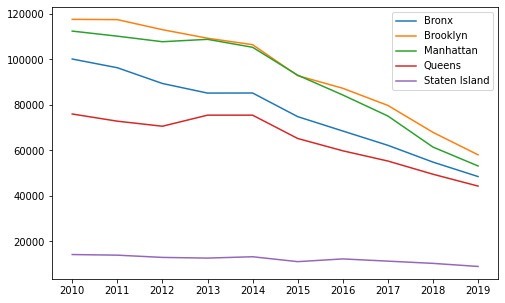

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
YEAR,,,,,
2010,100191,117634,112475,76024,14231
2011,96361,117517,110240,72863,13957
2012,89438,113098,107802,70641,12967
2013,85216,109341,108849,75511,12669
2014,85254,106503,105351,75507,13260
2015,74856,92890,93090,65252,11105
2016,68545,87329,84378,59845,12306
2017,62251,79789,75138,55344,11331
2018,54871,67958,61481,49541,10347


In [ ]:
# New York Total by Year and Borough
ny = df.groupby(['YEAR','BOROUGH'])['BOROUGH'].count().reset_index(name='TOTAL BY BOROUGH')
ny = ny.sort_values('YEAR',ascending=False)
ny = ny.pivot(index='YEAR',columns='BOROUGH',values='TOTAL BY BOROUGH')
plt.figure(figsize= (8,5))
plt.plot(ny.index, ny.BRONX)
plt.plot(ny.index, ny.BROOKLYN)
plt.plot(ny.index, ny.MANHATTAN)
plt.plot(ny.index, ny.QUEENS)
plt.plot(ny.index, ny['STATEN ISLAND'])
plt.legend(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])
plt.show()

In [ ]:
# New York Total Offenses by Year and Borough
ny1 = df.groupby(['YEAR','BOROUGH','OFFENSE'])['OFFENSE'].count().reset_index(name='TOTAL BY OFFENSE')
ny1 = ny1.sort_values(['YEAR','BOROUGH','TOTAL BY OFFENSE'],ascending=(False,True,False))
ny1 = ny1.reset_index(drop=True)
ny1

,YEAR,BOROUGH,OFFENSE,TOTAL BY OFFENSE
0,2019,BRONX,MISDEMEANOR ASSAULT,9176
1,2019,BRONX,DANGEROUS DRUGS,6458
2,2019,BRONX,MISCELLANEOUS LARCENY,4284
3,2019,BRONX,FELONY ASSAULT,4024
4,2019,BRONX,OFFENSES AGAINST PUBLIC,3820
...,...,...,...,...
1477,2010,STATEN ISLAND,ARSON,13
1478,2010,STATEN ISLAND,KIDNAPPING & RELATED OFFENSES,11
1479,2010,STATEN ISLAND,OTHER,6
1480,2010,STATEN ISLAND,GAMBLING,3


In [ ]:
# New York Total Offenses by Year and Race/Ethnicity
ny2 = df.groupby(['YEAR','BOROUGH','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name='TOTAL BY RACE/ETH')
ny2 = ny2.sort_values(['YEAR','BOROUGH','TOTAL BY RACE/ETH'], ascending=(False,True,False))
ny2 = ny2.reset_index(drop=True)
ny2

,YEAR,BOROUGH,RACE/ETHNICITY,TOTAL BY RACE/ETH
0,2019,BRONX,HISPANIC,23594
1,2019,BRONX,BLACK,22118
2,2019,BRONX,WHITE,1826
3,2019,BRONX,ASIAN,622
4,2019,BRONX,OTHER,356
...,...,...,...,...
245,2010,STATEN ISLAND,WHITE,5737
246,2010,STATEN ISLAND,BLACK,4915
247,2010,STATEN ISLAND,HISPANIC,3235
248,2010,STATEN ISLAND,ASIAN,238


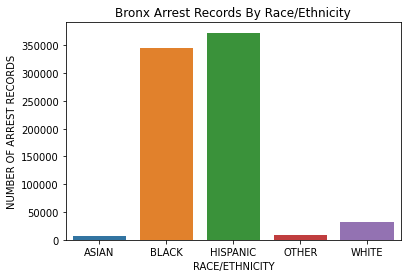

,RACE/ETHNICITY,NUMBER OF ARREST RECORDS
0,ASIAN,6969
1,BLACK,344815
2,HISPANIC,372690
3,OTHER,9397
4,WHITE,31628


In [ ]:
# Bronx
bx = df[df['BOROUGH'].isin(['BRONX'])]
bx= bx.groupby(['RACE/ETHNICITY'])['OFFENSE'].count().reset_index(name= 'NUMBER OF ARREST RECORDS')
sns.barplot(y= 'NUMBER OF ARREST RECORDS',x= 'RACE/ETHNICITY',data= bx)
plt.title('Bronx Arrest Records By Race/Ethnicity')
plt.show()
bx

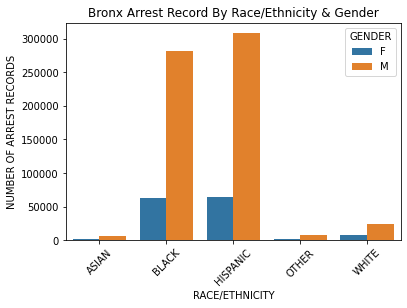

,GENDER,RACE/ETHNICITY,NUMBER OF ARREST RECORDS
0,F,ASIAN,957
1,F,BLACK,62593
2,F,HISPANIC,64045
3,F,OTHER,1182
4,F,WHITE,7117
5,M,ASIAN,6012
6,M,BLACK,282222
7,M,HISPANIC,308645
8,M,OTHER,8215
9,M,WHITE,24511


In [ ]:
# Bronx
bx1 = df[df['BOROUGH'].isin(['BRONX'])]
bx1= bx1.groupby(['GENDER','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name= 'NUMBER OF ARREST RECORDS')
sns.barplot(y= 'NUMBER OF ARREST RECORDS',x= 'RACE/ETHNICITY',hue = 'GENDER',data= bx1)
plt.title('Bronx Arrest Record By Race/Ethnicity & Gender')
plt.xticks(rotation=45)
plt.show()
bx1

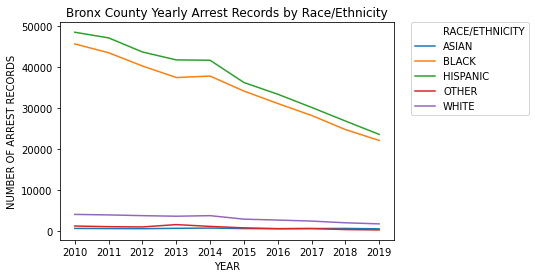

In [ ]:
# Bronx
bx2 = df[df['BOROUGH'].isin(['BRONX'])]
bx2 = bx2.groupby(['YEAR','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name='NUMBER OF ARREST RECORDS')
sns.lineplot(x='YEAR', y='NUMBER OF ARREST RECORDS', hue='RACE/ETHNICITY', data=bx2)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('Bronx County Yearly Arrest Records by Race/Ethnicity')
plt.show()

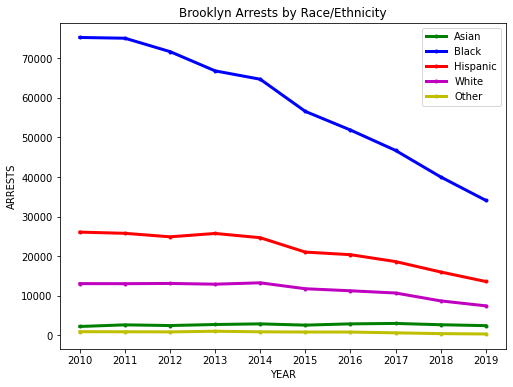

RACE/ETHNICITY,ASIAN,BLACK,HISPANIC,OTHER,WHITE
YEAR,,,,,
2010,2261,75248,26089,946,13090
2011,2674,75057,25789,926,13071
2012,2498,71674,24906,894,13126
2013,2764,66813,25757,1062,12945
2014,2922,64701,24679,913,13288
2015,2606,56577,21050,863,11794
2016,2922,51879,20394,857,11277
2017,3030,46730,18657,655,10717
2018,2707,40037,16029,457,8728


In [ ]:
# Brooklyn
br = df.loc[df['BOROUGH']=='BROOKLYN']
br = br.groupby(['YEAR','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name= 'TOTAL BY RACE/ETH')
br = br.pivot(index = 'YEAR', columns = 'RACE/ETHNICITY', values = 'TOTAL BY RACE/ETH')
plt.figure(figsize= (8,6))
plt.plot(br.index, br.ASIAN, 'g.-', linewidth=3, label = 'Asian')
plt.plot(br.index, br.BLACK, 'b.-', linewidth=3, label = 'Black')
plt.plot(br.index, br.HISPANIC, 'r.-', linewidth=3, label = 'Hispanic')
plt.plot(br.index, br.WHITE, 'm.-', linewidth=3, label = 'White')
plt.plot(br.index, br.OTHER, 'y.-', linewidth=3, label = 'Other')
plt.title('Brooklyn Arrests by Race/Ethnicity')
plt.xlabel('YEAR')
plt.ylabel('ARRESTS')
plt.legend()
plt.show()
br

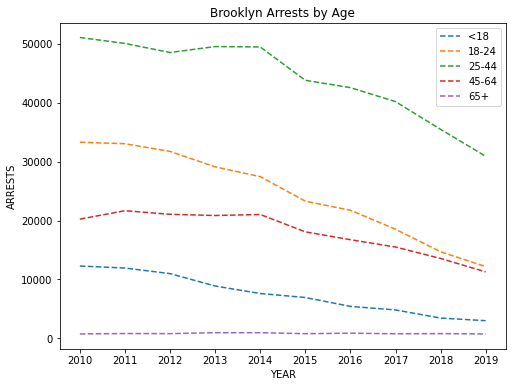

AGE,18-24,25-44,45-64,65+,<18
YEAR,,,,,
2010,33299,51091,20236,733,12275
2011,33041,50074,21666,808,11928
2012,31735,48539,21054,788,10982
2013,29119,49547,20851,947,8877
2014,27452,49478,21026,945,7602
2015,23292,43818,18077,779,6924
2016,21741,42568,16741,864,5415
2017,18520,40195,15499,762,4813
2018,14692,35486,13557,792,3431


In [ ]:
# Brooklyn
br1 = df[df['BOROUGH']=='BROOKLYN']
br1 = br1.groupby(['YEAR','AGE'])['AGE'].count().reset_index(name='TOTAL BY AGE')
br1 = br1.pivot(index='YEAR',columns='AGE',values='TOTAL BY AGE')
a = br1['<18']
b = br1['18-24']
c = br1['25-44']
d = br1['45-64']
e = br1['65+']
plt.figure(figsize= (8,6))
plt.plot(br1.index, a, '--')
plt.plot(br1.index, b, '--')
plt.plot(br1.index, c, '--')
plt.plot(br1.index, d, '--')
plt.plot(br1.index, e, '--')
plt.legend(['<18','18-24','25-44','45-64','65+'])
plt.xlabel('YEAR')
plt.ylabel('ARRESTS')
plt.title('Brooklyn Arrests by Age')
plt.show()
br1

In [ ]:
br2 = df[df['BOROUGH']=='BROOKLYN']
br2 = br2.groupby(['YEAR','PRECINCT'])['PRECINCT'].count().reset_index(name='TOTAL BY PRECINCT')
br2 = br2.loc[br2['YEAR']=='2019']
br2 = br2.sort_values(['TOTAL BY PRECINCT'], ascending=False)
br2

,YEAR,PRECINCT,TOTAL BY PRECINCT
221,2019,75,6010
220,2019,73,4401
214,2019,67,4031
209,2019,60,3187
219,2019,72,3144
225,2019,79,3056
217,2019,70,3002
228,2019,84,2970
223,2019,77,2968
227,2019,83,2737


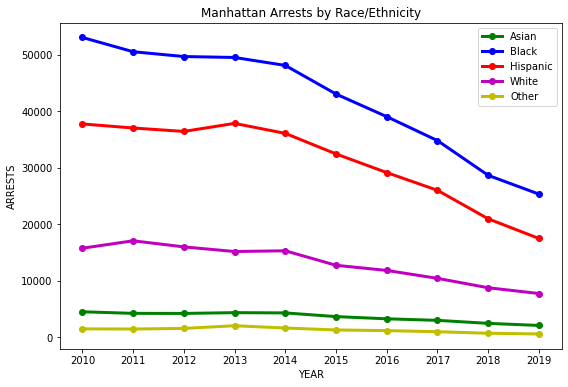

RACE/ETHNICITY,ASIAN,BLACK,HISPANIC,OTHER,WHITE,TOTAL ARRESTS
YEAR,,,,,,
2010,4504,53022,37726,1478,15745,112475
2011,4222,50499,37010,1453,17056,110240
2012,4209,49650,36401,1561,15981,107802
2013,4347,49483,37823,2035,15161,108849
2014,4302,48076,36054,1631,15288,105351
2015,3649,43012,32419,1288,12722,93090
2016,3260,39013,29120,1169,11816,84378
2017,2987,34778,25985,976,10412,75138
2018,2452,28633,20941,703,8752,61481


In [ ]:
# Manhattan
ma = df[df['BOROUGH'].isin(['MANHATTAN'])]
ma = ma.groupby(['YEAR','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name='TOTAL BY RACE/ETHN')
ma = ma.pivot(index='YEAR',columns='RACE/ETHNICITY',values='TOTAL BY RACE/ETHN')
ma["TOTAL ARRESTS"] = ma.sum(axis=1)
plt.figure(figsize= (9,6))
plt.plot(ma.index, ma.ASIAN, 'g-o', linewidth=3, label = 'Asian')
plt.plot(ma.index, ma.BLACK, 'b-o', linewidth=3, label = 'Black')
plt.plot(ma.index, ma.HISPANIC, 'r-o', linewidth=3, label = 'Hispanic')
plt.plot(ma.index, ma.WHITE, 'm-o', linewidth=3, label = 'White')
plt.plot(ma.index, ma.OTHER, 'y-o', linewidth=3, label = 'Other')
plt.title('Manhattan Arrests by Race/Ethnicity')
plt.xlabel('YEAR')
plt.ylabel('ARRESTS')
plt.legend()
plt.show()
ma

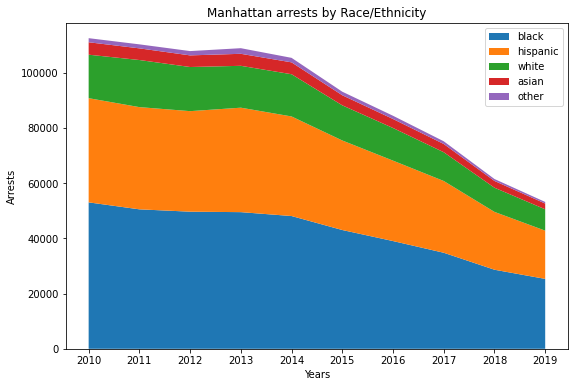

RACE/ETHNICITY,ASIAN,BLACK,HISPANIC,OTHER,WHITE
YEAR,,,,,
2010,4504,53022,37726,1478,15745
2011,4222,50499,37010,1453,17056
2012,4209,49650,36401,1561,15981
2013,4347,49483,37823,2035,15161
2014,4302,48076,36054,1631,15288
2015,3649,43012,32419,1288,12722
2016,3260,39013,29120,1169,11816
2017,2987,34778,25985,976,10412
2018,2452,28633,20941,703,8752


In [ ]:
# Manhattan
ma1 = df[df['BOROUGH'].isin(['MANHATTAN'])]
ma1 = ma1.groupby(['YEAR','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name='TOTAL BY RACE/ETHN')
ma1 = ma1.pivot(index='YEAR',columns='RACE/ETHNICITY',values='TOTAL BY RACE/ETHN')

years = ma1.index
black = ma1['BLACK']
hispanic = ma1['HISPANIC']
white = ma1['WHITE']
asian = ma1['ASIAN']
other = ma1['OTHER']
plt.figure(figsize= (9,6))
plt.stackplot(years, black, hispanic, white, asian, other, labels=['black','hispanic','white','asian','other'])
plt.legend(loc='upper right')

plt.xlabel('Years')
plt.ylabel('Arrests')
plt.title('Manhattan arrests by Race/Ethnicity')
plt.show()

ma1

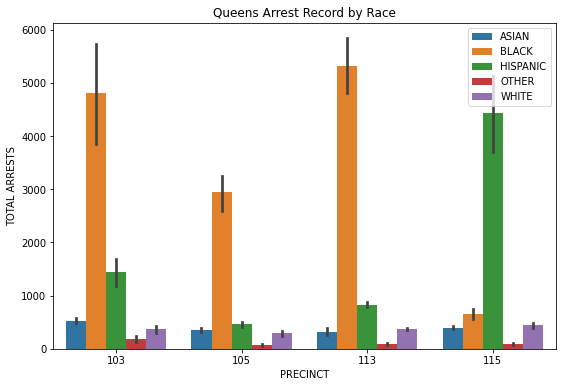

In [ ]:
qu = df.loc[df['BOROUGH'].isin(['QUEENS'])]
qu = qu.loc[df['PRECINCT'].isin(['103','105','113','115'])]
qu = qu.groupby(['YEAR','PRECINCT','RACE/ETHNICITY'])['BOROUGH'].count().reset_index(name='TOTAL ARRESTS')
plt.figure(figsize=(9,6))
sns.barplot(y='TOTAL ARRESTS',x='PRECINCT',hue='RACE/ETHNICITY', data=qu)
plt.title('Queens Arrest Record by Race')
plt.legend(loc=1)
plt.show()

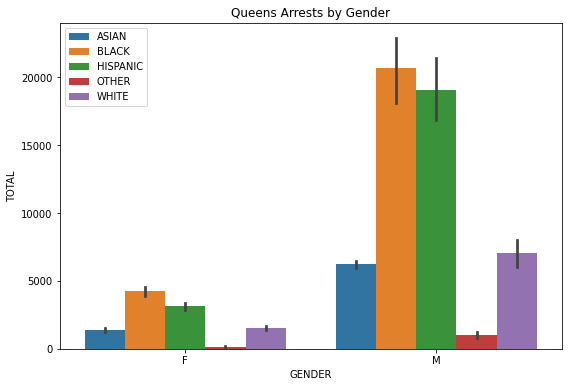

In [ ]:
qu1 = df.loc[df['BOROUGH'].isin(['QUEENS'])]
qu1 = qu1.groupby(['YEAR','GENDER','RACE/ETHNICITY'])['GENDER'].count().reset_index(name='TOTAL')
plt.figure(figsize=(9,6))
sns.barplot(x='GENDER',y='TOTAL',hue='RACE/ETHNICITY',data=qu1)
plt.title('Queens Arrests by Gender')
plt.legend(loc=2)
plt.show()

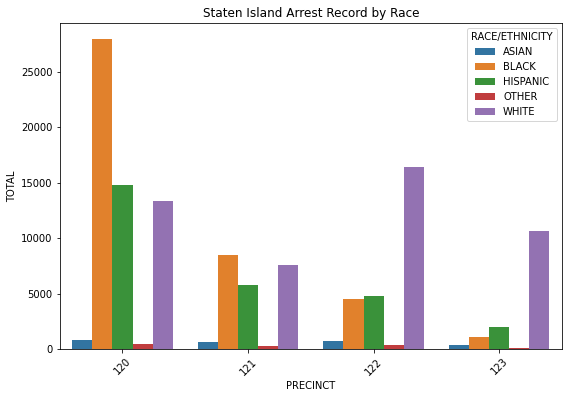

In [ ]:
si = df.loc[df['BOROUGH'].isin(['STATEN ISLAND'])]
si = si.groupby(['PRECINCT','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name='TOTAL')
plt.figure(figsize=(9,6))
sns.barplot(y='TOTAL',x='PRECINCT',hue='RACE/ETHNICITY',data=si)
plt.title('Staten Island Arrest Record by Race')
plt.xticks(rotation=45)
plt.show()

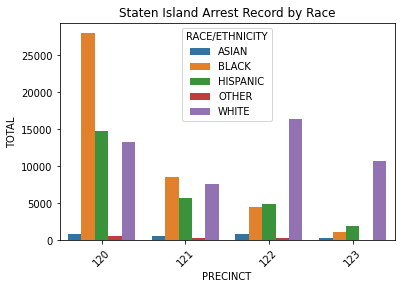

,PRECINCT,RACE/ETHNICITY,TOTAL
0,120,ASIAN,870
1,120,BLACK,27968
2,120,HISPANIC,14763
3,120,OTHER,507
4,120,WHITE,13320
5,121,ASIAN,619
6,121,BLACK,8521
7,121,HISPANIC,5746
8,121,OTHER,290
9,121,WHITE,7539


In [ ]:
si1 = df.loc[df['BOROUGH'].isin(['STATEN ISLAND'])]
si1 = si1.groupby(['PRECINCT','RACE/ETHNICITY'])['RACE/ETHNICITY'].count().reset_index(name='TOTAL')
sns.barplot(y='TOTAL',x='PRECINCT',hue='RACE/ETHNICITY',data=si1)
plt.title('Staten Island Arrest Record by Race')
plt.xticks(rotation=45)
plt.show()
si1

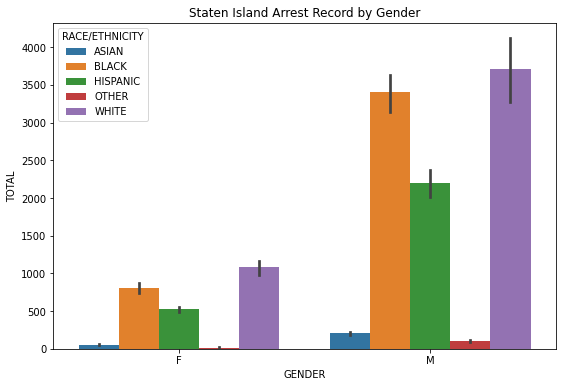

,YEAR,GENDER,RACE/ETHNICITY,TOTAL
0,2010,F,ASIAN,70
1,2010,F,BLACK,990
2,2010,F,HISPANIC,633
3,2010,F,OTHER,18
4,2010,F,WHITE,1259
...,...,...,...,...
95,2019,M,ASIAN,285
96,2019,M,BLACK,2612
97,2019,M,HISPANIC,1784
98,2019,M,OTHER,68


In [ ]:
si2 = df.loc[df['BOROUGH'].isin(['STATEN ISLAND'])]
si2 = si2.groupby(['YEAR','GENDER','RACE/ETHNICITY'])['GENDER'].count().reset_index(name='TOTAL')
plt.figure(figsize=(9,6))
sns.barplot(y='TOTAL',x='GENDER',hue='RACE/ETHNICITY',data=si2)
plt.title('Staten Island Arrest Record by Gender')
plt.show()
si2

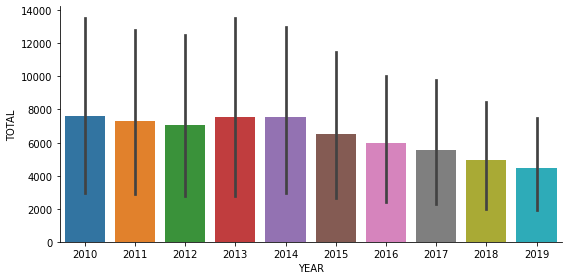

In [ ]:
sns.catplot(x='YEAR',y='TOTAL',height=4,aspect=2,kind='bar',data=qu1)

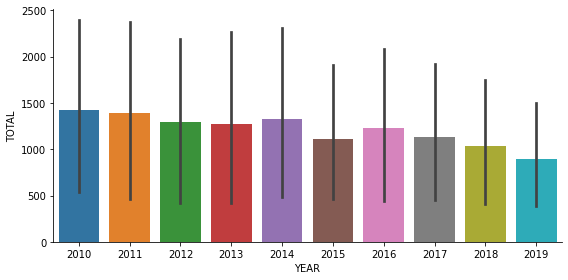

In [ ]:
sns.catplot(x="YEAR", y="TOTAL", height=4, aspect=2, kind="bar", data=si2)

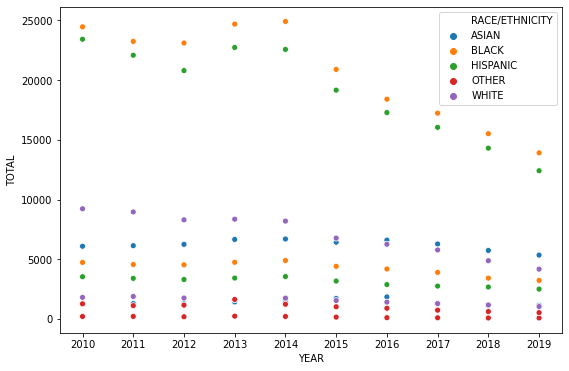

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='YEAR', 
                     y="TOTAL",
                     hue="RACE/ETHNICITY",
                     data=qu1)

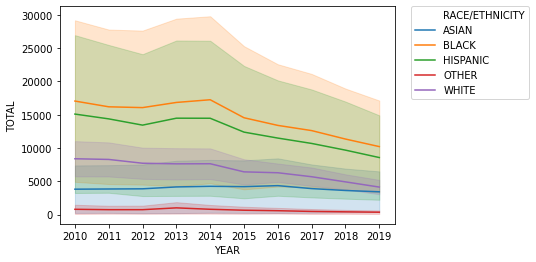

,BOROUGH,YEAR,RACE/ETHNICITY,TOTAL
0,QUEENS,2010,ASIAN,7377
1,QUEENS,2010,BLACK,29196
2,QUEENS,2010,HISPANIC,26960
3,QUEENS,2010,OTHER,1464
4,QUEENS,2010,WHITE,11027
...,...,...,...,...
95,STATEN ISLAND,2019,ASIAN,352
96,STATEN ISLAND,2019,BLACK,3288
97,STATEN ISLAND,2019,HISPANIC,2219
98,STATEN ISLAND,2019,OTHER,90


In [ ]:
sq1 = df[df['BOROUGH'].isin(['QUEENS','STATEN ISLAND'])]
sq1 = sq1.groupby(['BOROUGH','YEAR','RACE/ETHNICITY'])['BOROUGH'].count().reset_index(name='TOTAL')
sns.lineplot(x='YEAR', y='TOTAL', hue='RACE/ETHNICITY', data=sq1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()
sq1